In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


<AxesSubplot:xlabel='Age', ylabel='Income($)'>

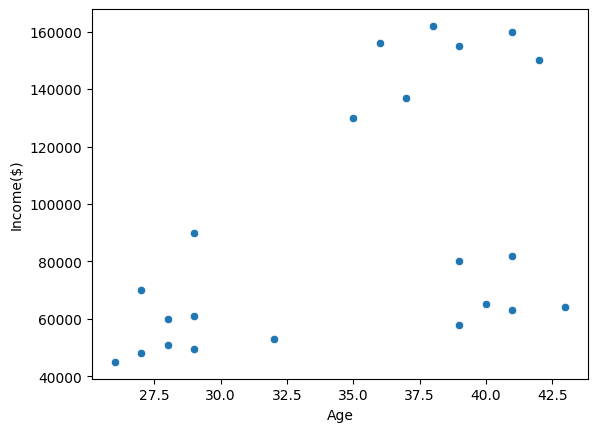

In [5]:
sns.scatterplot(x='Age', y='Income($)',data=df)

In [6]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [7]:
y_pred = km.fit_predict(df[['Age','Income($)']])

In [8]:
y_pred

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [9]:
df['cluster'] = y_pred
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


<AxesSubplot:xlabel='Age', ylabel='Income($)'>

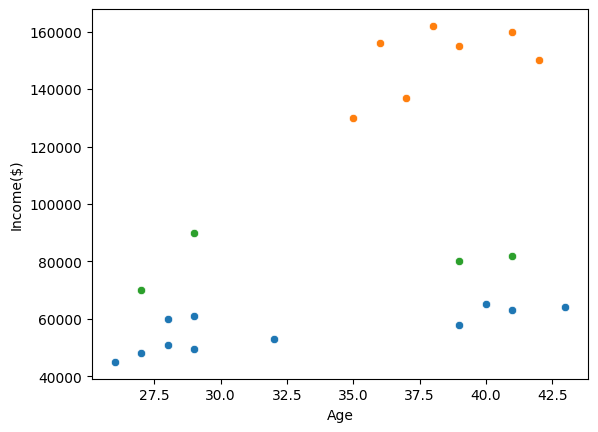

In [10]:
df0 = df[df['cluster']==0]
df1 = df[df['cluster']==1]
df2 = df[df['cluster']==2]
sns.scatterplot(x='Age',y='Income($)',data=df0)
sns.scatterplot(x='Age',y='Income($)',data=df1)
sns.scatterplot(x='Age',y='Income($)',data=df2)

In [11]:
scalar = MinMaxScaler()

In [14]:
scalar.fit(df[['Income($)']])
df['Income($)'] = scalar.transform(df[['Income($)']])
df

,Name,Age,Income($),cluster
0,Rob,27,0.213675,2
1,Michael,29,0.384615,2
2,Mohan,29,0.136752,0
3,Ismail,28,0.128205,0
4,Kory,42,0.897436,1
5,Gautam,39,0.940171,1
6,David,41,0.982906,1
7,Andrea,38,1.000000,1
8,Brad,36,0.948718,1
9,Angelina,35,0.726496,1


In [15]:
# Same thing for age
scalar.fit(df[['Age']])
df['Age'] = scalar.transform(df[['Age']])
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [16]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(df[['Age','Income($)']])
y_pred

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [17]:
df.drop('cluster',axis=1,inplace=True)
df.head()

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436


In [18]:
df['cluster'] = y_pred
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


<AxesSubplot:xlabel='Age', ylabel='Income($)'>

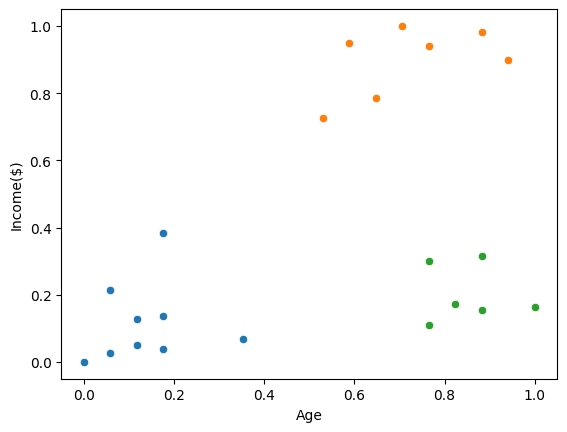

In [19]:
df0 = df[df['cluster']==0]
df1 = df[df['cluster']==1]
df2 = df[df['cluster']==2]
sns.scatterplot(x='Age',y='Income($)',data=df0)
sns.scatterplot(x='Age',y='Income($)',data=df1)
sns.scatterplot(x='Age',y='Income($)',data=df2)

In [20]:
#Check the centroids
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

<AxesSubplot:xlabel='Age', ylabel='Income($)'>

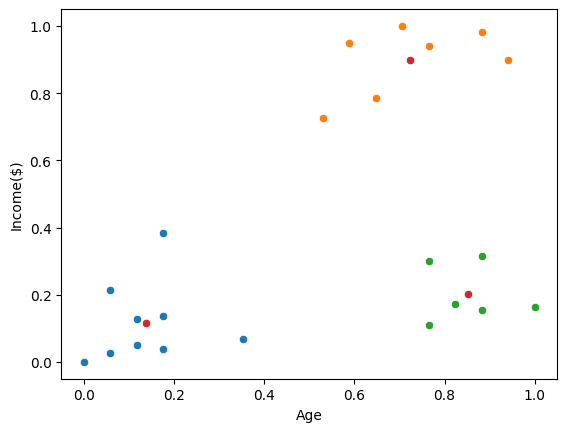

In [21]:
# Plot the centroids
df0 = df[df['cluster']==0]
df1 = df[df['cluster']==1]
df2 = df[df['cluster']==2]
sns.scatterplot(x='Age',y='Income($)',data=df0)
sns.scatterplot(x='Age',y='Income($)',data=df1)
sns.scatterplot(x='Age',y='Income($)',data=df2)
sns.scatterplot(x=km.cluster_centers_[:,0],y=km.cluster_centers_[:,1])

So when we get a big dataset with alot of features it's hard to plot scatter plot for those features.<br>
So we use Elbow Plot for that.

In [36]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

In [37]:
sse

[5.434011511988178,
 2.091136388699078,
 0.4750783498553096,
 0.34910470944195654,
 0.26640301246684156,
 0.21878010893330452,
 0.1685851223602976,
 0.1407244898535231,
 0.10383752586603562]

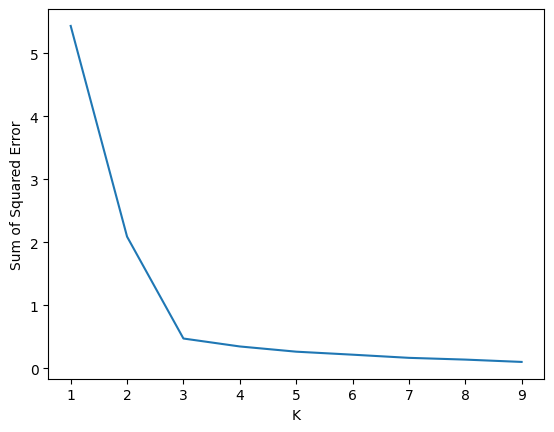

In [40]:
plt.xlabel('K')
plt.ylabel('Sum of Squared Error')
plt.plot(k_rng,sse)
plt.show()